In [2]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import pandas as pd

import generaluse as gu
import getmeresults as gmr
import os

%load_ext autoreload
%autoreload 2

In [3]:
folder_name = 'batch03'

dictionary = gu.getImgNamesAndPaths(f"rawdata/{folder_name}")

list_filenames = list(dictionary.keys())
list_filepaths = [*dictionary.values()]

list_data = []
for name, path in zip(list_filenames,list_filepaths):
    data = dict()
    data["Filename"] = name
    data["Filepath"] = path
    list_data.append(data)

dataframe = pd.DataFrame(data=list_data)
dataframe

,Filename,Filepath
0,Experiment-863.jpg,rawdata/batch03/Experiment-863.jpg
1,Experiment-866.jpg,rawdata/batch03/Experiment-866.jpg
2,Experiment-867.jpg,rawdata/batch03/Experiment-867.jpg
3,Experiment-870.jpg,rawdata/batch03/Experiment-870.jpg
4,Experiment-871.jpg,rawdata/batch03/Experiment-871.jpg


In [4]:
list_imgs = gu.getImagesFromPathfile(list_filepaths,cv2.COLOR_BGR2GRAY)

In [5]:
global_parameters = [

{
    'first_kernel_size': (5,5),
    'second_kernel_size': (3,3),
    'contours_mult': 2.5,
    'bh_ks': (7,7),
    'bhm_iter': 4,
    'bhm_mult': 60,
    'cont_mult': 2.5,
    'ws_ths_factor': 0.025,
    'ws_gl_vecinity': 15,
},

{
    'first_kernel_size': (5,5),
    'second_kernel_size': (3,3),
    'contours_mult': 2.5,
    'bh_ks': (7,7),
    'bhm_iter': 4,
    'bhm_mult': 80,
    'cont_mult': 2,
    'ws_ths_factor': 0.025,
    'ws_gl_vecinity': 15,
},

{
    'first_kernel_size': (5,5),
    'second_kernel_size': (3,3),
    'contours_mult': 2.5,
    'bh_ks': (7,7),
    'bhm_iter': 2,
    'bhm_mult': 60,
    'cont_mult': 1,
    'ws_ths_factor': 0.025,
    'ws_gl_vecinity': 15,
},

{
    'first_kernel_size': (5,5),
    'second_kernel_size': (3,3),
    'contours_mult': 2.5,
    'bh_ks': (7,7),
    'bhm_iter': 4,
    'bhm_mult': 60,
    'cont_mult': 2.5,
    'ws_ths_factor': 0.025,
    'ws_gl_vecinity': 15,
},

{
    'first_kernel_size': (5,5),
    'second_kernel_size': (3,3),
    'contours_mult': 2.5,
    'bh_ks': (7,7),
    'bhm_iter': 4,
    'bhm_mult': 60,
    'cont_mult': 2.5,
    'ws_ths_factor': 0.025,
    'ws_gl_vecinity': 15,
}
]

In [6]:
list_percentages = []
list_segmentations = []
list_colorings = []

for i in range(len(list_imgs)):
    parameters = global_parameters[i]
    percentages, segmentation, coloring = gmr.getMeResults(list_imgs[i], parameters=parameters)
    list_percentages.append(percentages)
    list_segmentations.append(segmentation)
    list_colorings.append(coloring)

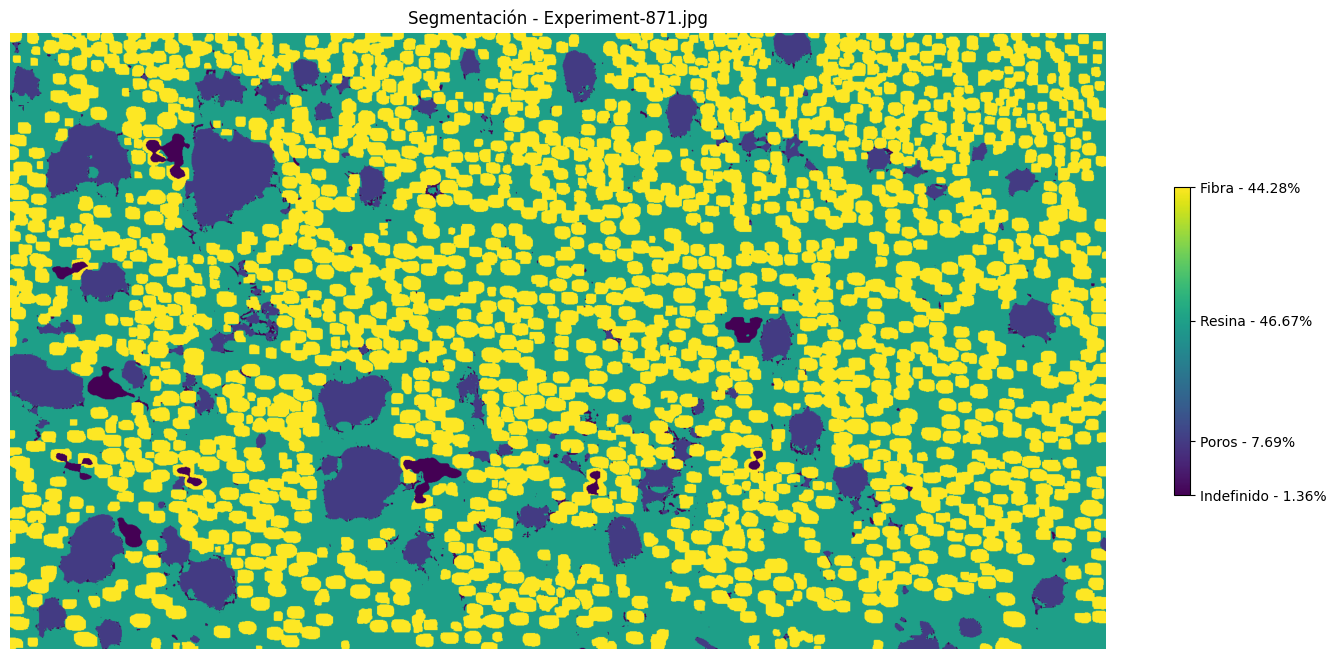

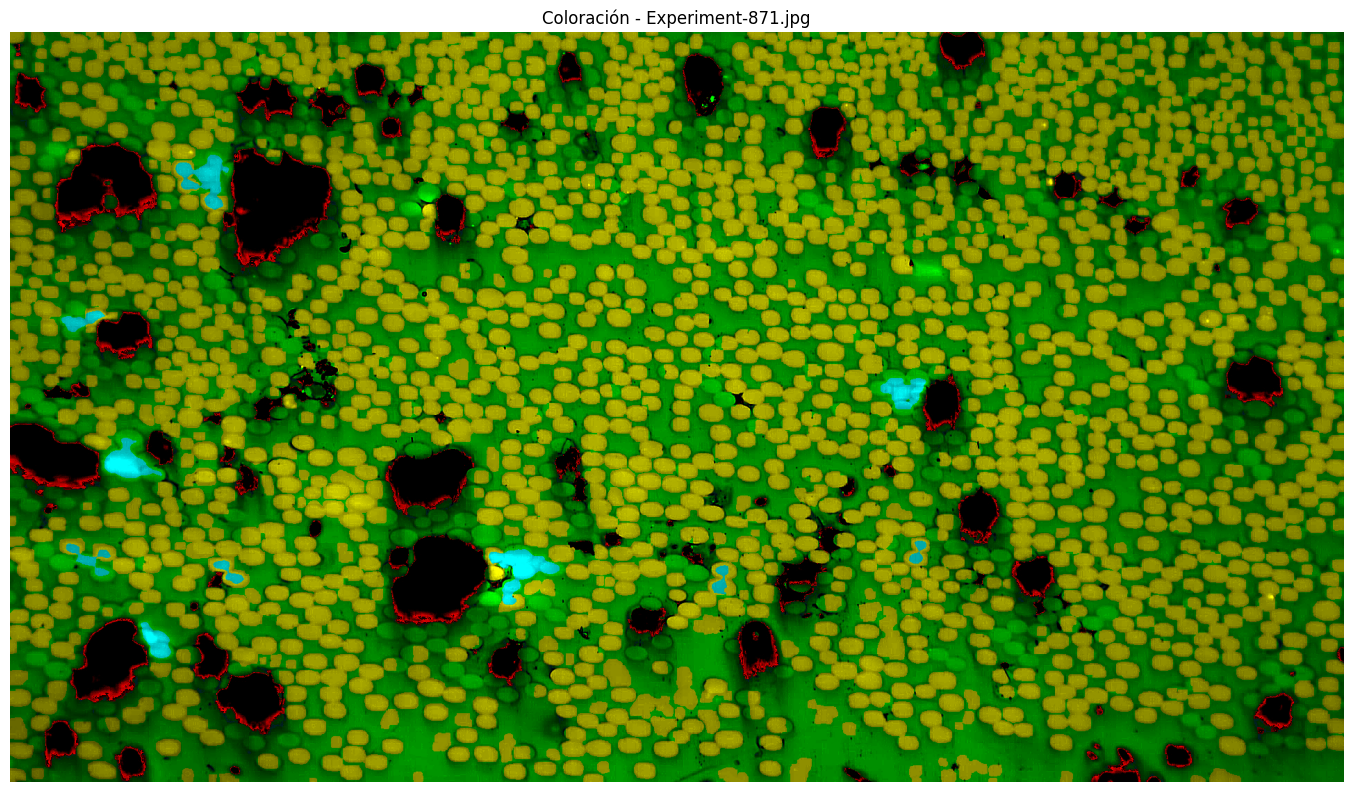

In [7]:
def getSegmentationFigure(segmentation, percentages, filename):
    fig = plt.figure(figsize=(14, 8))
    plt.imshow(segmentation)
    plt.axis('off')

    # Agregar la barra de color con etiquetas personalizadas
    cbar = plt.colorbar(orientation="vertical",shrink=0.4)
    cbar.set_ticks([20,60,150,250])
    cbar.set_ticklabels([
        f"Indefinido - {percentages['undefined']:.2f}%",
        f"Poros - {percentages['pores']:.2f}%",
        f"Resina - {percentages['resin']:.2f}%",
        f"Fibra - {percentages['fibers']:.2f}%"
        ])
    plt.title(f"Segmentación - {filename}")
    plt.tight_layout()

def getColoringFigure(coloring, filename):
    fig = plt.figure(figsize=(14, 8))
    plt.imshow(coloring,vmin=0,vmax=255)
    plt.axis('off')
    plt.title(f"Coloración - {filename}")
    plt.tight_layout()

percentages = list_percentages[-1]
segmentation = list_segmentations[-1]
coloring = list_colorings[-1]

getSegmentationFigure(segmentation, percentages, list_filenames[-1])
plt.show()

getColoringFigure(coloring, list_filenames[-1])
plt.show()


In [8]:
def saveFigures(batch_folder_name, filename, percentages, segmentation, coloring):
    
    savings_folder = f"procimgs/{batch_folder_name}"
    
    # Figuras de segmentación
    getSegmentationFigure(segmentation, percentages, filename)
    
    os.makedirs(savings_folder, exist_ok=True)
    fname = os.path.join(savings_folder, f'seg-{filename}')
    plt.savefig(fname=fname)
    plt.close()

    # Figuras de coloración
    getColoringFigure(coloring, filename)
    fname = os.path.join(savings_folder, f'col-{filename}')
    plt.savefig(fname=fname)
    plt.close()

for i in range(len(list_imgs)):
    percentages = list_percentages[i]
    segmentation = list_segmentations[i]
    coloring = list_colorings[i]
    
    # Save figures
    saveFigures(folder_name, list_filenames[i], percentages, segmentation, coloring)

In [9]:
percentages_data = pd.DataFrame(data=list_percentages)

dataframe_results = pd.concat([dataframe,percentages_data], axis=1).reindex(dataframe.index)
dataframe_results

dataframe_results_to_excel = dataframe_results.drop(["Filepath","sumcheck"], axis=1)
dataframe_results_to_excel

,Filename,pores,fibers,resin,undefined
0,Experiment-863.jpg,8.141734,51.059558,39.549190,1.249518
1,Experiment-866.jpg,12.053144,40.900993,44.996528,2.049334
2,Experiment-867.jpg,9.949942,40.978492,47.036892,2.034674
3,Experiment-870.jpg,5.621431,47.216725,46.011236,1.150608
4,Experiment-871.jpg,7.689525,44.275029,46.672309,1.363137


In [12]:
dataframe_results_to_excel.to_excel(f"procimgs/{folder_name}/{folder_name}.xlsx", index=False)